### Set-based models of uncertainty

The two most common set-based models of uncertainty are convex sets and
interval models. The popularity of these models can be attributed to the
computational simplifications they enable, relative to non-convex set
models of uncertainty. Set-based models are a method of characterising
uncertainty, without describing the level of belief for each distinct
value, as in probabilistic models. Alternatively, they can be seen as an
initial way of prescribing the support for an as-yet undetermined
probabilistic model.[^1]

#### Interval models of uncertainty

An interval model of uncertainty is a set of numbers where any number
falling between the upper and lower bounds of the interval is included
in the set. In the interval notation, an interval uncertainty model is
given by
$X = [\underline{x}, \overline{x}] = \{x \in \mathbb{R} \mid \underline{x} \le x \le \overline{x} \}$
{cite}`mooreintroduction2009`. Note that interval models can also be defined
for the case where the endpoints are excluded from the intervals, and in
this case regular brackets are used instead of square brackets. Interval
models can be re-parameterised in terms of their centre and interval
radius, $c = \frac{\overline{x} + \underline{x}}{2}$ and
$r = \frac{\overline{x} - \underline{x}}{2}$. Interval models usually
don't express dependency between multiple variables.

Note that when using an interval model of uncertainty, the relative
likelihoods of different values of the variable are unknown and
therefore it is impossible to draw precise samples from the model in the
same sense that one draws samples from a probability distribution. Put
simply, an interval model represents complete lack of knowledge, apart
from the bounds. For this reason, they are often preferred for modelling
severe epistemic uncertainty, sometimes known as incertitude, rather
than aleatory uncertainty, where the ability to model the variability of
a quantity is the main focus {cite}`Kreinovich2013`.

Basic computation with interval models is typically computationally
inexpensive since one can rely upon interval arithmetic for elementary
operations. Complex functions and computer codes can be 'converted' to
accept interval inputs by applying the so-called natural extension,
where arithmetic operations are converted to interval arithmetic and
real valued inputs are replaced with interval values
{cite}`mooreintroduction2009`. However, applying the natural interval
extension can result in gradual widening of the prediction interval
during propagation through the code, due to repeated appearance of the
same variables {cite}`mooreintroduction2009`.

In many cases, one can create a Taylor expansion for $g(x)$ up to terms
of a specific order in $x$, and then use an interval bound for the
rounding error to rigorously and accurately bound $g(x)$
{cite}`hansen1975generalized` {cite}`makino2003taylor` {cite}`nedialkov2004interval`.
Intermediate linear Taylor models may be combined together to yield
relatively tight bounds on the output with reduced computational
expense, since computing the maximum of a multivariate linear function
over a set of intervals is trivial. Engineers could choose to neglect
the modelling of the remainder in cases where a rigorous bounding of the
range of $g(x)$ over $X$ is not required, or the Taylor model is
sufficiently accurate. Alternatively, if $g(x)$ is represented a
Bernstein polynomial, bounds on the range of $g(x)$ over $X$ can be
obtained analytically {cite}`crespo2012unifying`.

For complex functions or computer codes it may not be possible to
rewrite the code in terms of interval arithmetic, as the code may be
'black-box' and therefore inaccessible. In these cases it may be
necessary to rely upon numerical optimisation to compute approximate
bounds on the range of $g(x)$. For example, if one wishes to make
predictions about the output of a model $g(x)$ for
$x \in [\underline{x}, \overline{x}]$ then one must evaluate

```{math}
:label: eqn_interval_prop
    [\min_{x \in [\underline{x}, \overline{x}]} g(x), \max_{x \in [\underline{x}, \overline{x}]} g(x)].
```

For general $g(x)$, a non-linear optimiser with the ability to respect
bounds must be used to solve
{eq}`eqn_interval_prop`, for example Bayesian optimisation or a
genetic algorithm. A brute force search could also be used to solve
{eq}`eqn_interval_prop`. If $g(x)$ is convex, then one may apply
convex optimisation routines {cite}`boyd2004convex`. Due to the curse of
dimensionality this optimisation becomes more difficult when there are
many interval variables to be propagated, since the complexity for many
convex optimisation algorithms increases with the dimensionality of the
problem {cite}`bubeck2015convex`.

The method of Cauchy deviates offers an efficient alternative to
computing finite difference gradients of $g(x)$ in order to apply a
Taylor expansion for black-box functions {cite}`kreinovich2004monte`. The
Cauchy deviates method evaluates $g(x)$ for a set of transformed samples
drawn from Cauchy distributions and then uses the property that the
linear combination of Cauchy distributed random variables is also Cauchy
distributed with a known distribution parameter to bound $g(x)$.

#### Worked example : Interval Models

This time, the model of rainfall will be given by an interval.
Imagine the rainfall in London on a particular day is known to be bounded in the interval $x \in [9, 11]$.

Again the number of umbrellas sold is given by $1000 x^2$.

To bound the number of umbrellas sold we must evaluate
$[\min_{x \in [9, 11]} 1000 x^2, \max_{x \in [9, 11]} 1000 x^2]$

This can be evaluated analytically since $x^2$ is monotonic in $x$ for positive $x$:

The number of umbrellas sold falls in the interval: [81000, 121000]


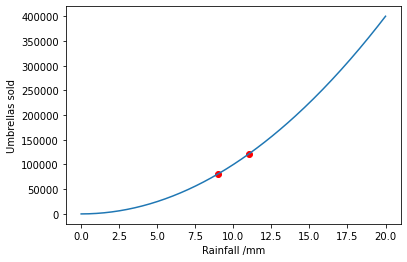

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


def g(x): return 1000 * x ** 2


min_x = 9
max_x = 11

umbrellas_sold = [g(min_x), g(max_x)]
print("The number of umbrellas sold falls in the interval: {}".format(
    umbrellas_sold))

x_grid = np.linspace(0, 20, num=200)
plt.plot(x_grid, g(x_grid))
plt.scatter([min_x, max_x], g(np.array([min_x, max_x])), color="red")
plt.xlabel("Rainfall /mm")
plt.ylabel("Umbrellas sold")
plt.show()

This can also be evaluated approximately using a taylor series (shown in green):

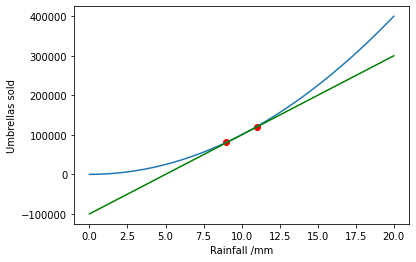

The number of umbrellas sold falls in the interval: [80000.0, 120000.0]


In [5]:
def g_dash(x): return 1000 * 2 * x


x_mid = (max_x + min_x) / 2


def taylor_expansion(x): return g(x_mid) + (x - x_mid) * g_dash(x_mid)


x_grid = np.linspace(0, 20, num=200)
plt.plot(x_grid, g(x_grid))
plt.plot(x_grid, taylor_expansion(x_grid), color="green")
plt.scatter([min_x, max_x], g(np.array([min_x, max_x])), color="red")
plt.xlabel("Rainfall /mm")
plt.ylabel("Umbrellas sold")
plt.show()

umbrellas_sold = [taylor_expansion(min_x), taylor_expansion(max_x)]
print("The number of umbrellas sold falls in the interval: {}".format(
    umbrellas_sold))

Finally we use black box optimisation in `scipy.optimize` to evaluate the interval model:

In [6]:
min_umbrellas = scipy.optimize.minimize(g, x0=x_mid, bounds=[(min_x, max_x)])
neg_max_umbrellas = scipy.optimize.minimize(lambda x: -g(x),
                                            x0=x_mid,
                                            bounds=[(min_x, max_x)])
print("The number of umbrellas sold falls in the interval: {}".format(
    [min_umbrellas.fun[0], -neg_max_umbrellas.fun[0]]))

The number of umbrellas sold falls in the interval: [81000.0, 121000.0]


(sec:set-based)=
#### Convex set models of uncertainty

A convex set is defined as a set where, for any two points in the set,
all points along the connecting line between the two points are also
included in the set. Convex sets are useful as they are in many ways
similar to interval models, but allow dependencies to be modelled
between variables. {cite}`ben2013convex` provide examples of how convex set
models may be used in engineering practice. There is a deep connection
between interval models and convex set models. An interval model with
multiple variables would be represented as the specific case of a
hyper-rectangular convex set. In addition, affine transformations of
hyper-rectangular convex sets result in a class of models known as
zonotopes {cite}`stolfi2003introduction`.

The smallest convex set containing a particular set of data points is
termed the convex hull of the dataset. Computing the convex hull of a
dataset has complexity
$\mathcal{O}(n\log{n} + n^{\lfloor \frac{d}{2} \rfloor})$
{cite}`Chazelle1993`, where $\lfloor \cdot \rfloor$ is the floor operator
which rounds a real number down to the nearest integer, and therefore in
practice one often learns a simplified representation of the convex set
with desirable computational properties.

$\ell_p$ ellipsoids (for $p>1$) are a particularly useful case of a
convex set, because they can be easily manipulated in calculations
{cite}`wang2018mixtrain`. An $\ell_p$ ellipsoid is given by the set
$X = \{ x \mid \left\| x - c\right\| _{p, w} \le r \}$, where the
weighted $\ell_p$ norm is
$\left\| x \right\| _{p, w} = (\sum^{N}_{i=1} |w_i x_i|^p)^{\frac{1}{p}}$,
$x_i$ are variables in a set of dimensionality $N$, $c\in\mathbb{R}^N$
represents the centre point of the set, and $w_i$ are weights
controlling the relative uncertainty in each variable {cite}`Huang2008`. $p$
can be adjusted to control the correlation between the variables. The
case $\ell_\infty$ corresponds to the hyper-rectangle (interval) model,
where there is no correlation between variables. When $p$ is decreased
the variables become more correlated.

Computation with convex set models is performed in the same way as with
interval models, except the bounds on $x$ are replaced with convex
constraints: 


```{math}
:label: eqn_convex-set-prop
[\min_{x} \{ g(x): x \in X\}, \max_{x} \{g(x): x \in X\}], 

```

where $X$ is a convex
set. If $g(x)$ is linear with known gradient, and $X$ is a hyper-sphere
or hyper-rectangle, then this optimisation program in
{eq}`eqn_convex-set-prop` admits an analytic solution
{cite}`meyer2017notes`. If the convex set is small then the analytic solution
may be a reasonable solution when used with a Taylor expansion for
$g(x)$, as with interval uncertainty models.




[^1]: The support of a distribution is the set of values for which the
    probability measure is non-zero.